In [ ]:
#@title # Packages
# install
!pip install catboost
!pip install sort-dataframeby-monthorweek
!pip install sorted-months-weekdays

# basic
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 32)

# vis
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import plotly.express as px
%matplotlib inline

# missing value vis
import missingno as msno

# heatmap
import folium
from folium.plugins import HeatMap

# classification modelling
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, precision_score, f1_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import VotingClassifier

# deep learning
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
import keras
from keras.layers import Dense
from keras.models import Sequential

# order month
import sort_dataframeby_monthorweek as sd

#balance
from imblearn.over_sampling import SMOTE

# encoder
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

# Category/Num feature selection
from scipy.stats import chi2_contingency
from scipy import stats

# ignored warning
import warnings
warnings.filterwarnings('ignore')

# Load Data & Data Pre Processing

## Overview

In [77]:
# Load data
hotel = pd.read_csv('/content/hotel_bookings.csv')
hotel

hotel  is_canceled  lead_time  arrival_date_year  \
0       Resort Hotel            0        342               2015   
1       Resort Hotel            0        737               2015   
2       Resort Hotel            0          7               2015   
3       Resort Hotel            0         13               2015   
4       Resort Hotel            0         14               2015   
...              ...          ...        ...                ...   
119385    City Hotel            0         23               2017   
119386    City Hotel            0        102               2017   
119387    City Hotel            0         34               2017   
119388    City Hotel            0        109               2017   
119389    City Hotel            0        205               2017   

       arrival_date_month  arrival_date_week_number  \
0                    July                        27   
1                    July                        27   
2                    July                        27   
3                    July                        27   
4                    July                        27   
...                   ...                       ...   
119385             August                        35   
119386             August                        35   
119387             August                        35   
119388             August                        35   
119389             August                        35   

        arrival_date_day_of_month  stays_in_weekend_nights  \
0                               1                        0   
1                               1                        0   
2                               1                        0   
3                               1                        0   
4                               1                        0   
...                           ...                      ...   
119385                         30                        2   
119386                         31                        2   
119387                         31                        2   
119388                         31                        2   
119389                         29                        2   

        stays_in_week_nights  adults  children  babies meal country  \
0                          0       2       0.0       0   BB     PRT   
1                          0       2       0.0       0   BB     PRT   
2                          1       1       0.0       0   BB     GBR   
3                          1       1       0.0       0   BB     GBR   
4                          2       2       0.0       0   BB     GBR   
...                      ...     ...       ...     ...  ...     ...   
119385                     5       2       0.0       0   BB     BEL   
119386                     5       3       0.0       0   BB     FRA   
119387                     5       2       0.0       0   BB     DEU   
119388                     5       2       0.0       0   BB     GBR   
119389                     7       2       0.0       0   HB     DEU   

       market_segment distribution_channel  is_repeated_guest  \
0              Direct               Direct                  0   
1              Direct               Direct                  0   
2              Direct               Direct                  0   
3           Corporate            Corporate                  0   
4           Online TA                TA/TO                  0   
...               ...                  ...                ...   
119385  Offline TA/TO                TA/TO                  0   
119386      Online TA                TA/TO                  0   
119387      Online TA                TA/TO                  0   
119388      Online TA                TA/TO                  0   
119389      Online TA                TA/TO                  0   

        previous_cancellations  previous_bookings_not_canceled  \
0                            0                               0   
1                            0        

In [78]:
# Columns
hotel.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [79]:
# columns counts
len(hotel.columns)

32

In [80]:
# columns type
hotel.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             float64
company                           float64
days_in_waiting_list                int64
customer_type                      object
adr                               float64
required_car_parking_spaces         int64
total_of_special_requests           int64
reservation_status                 object
reservation_status_date            object
dtype: object

In [81]:
# columns type count
hotel.dtypes.value_counts()

int64      16
object     12
float64     4
Name: count, dtype: int64

In [82]:
# DataFrame size
hotel.shape

(119390, 32)

In [83]:
# Stats
hotel.describe()

is_canceled      lead_time  arrival_date_year  \
count  119390.000000  119390.000000      119390.000000   
mean        0.370416     104.011416        2016.156554   
std         0.482918     106.863097           0.707476   
min         0.000000       0.000000        2015.000000   
25%         0.000000      18.000000        2016.000000   
50%         0.000000      69.000000        2016.000000   
75%         1.000000     160.000000        2017.000000   
max         1.000000     737.000000        2017.000000   

       arrival_date_week_number  arrival_date_day_of_month  \
count             119390.000000              119390.000000   
mean                  27.165173                  15.798241   
std                   13.605138                   8.780829   
min                    1.000000                   1.000000   
25%                   16.000000                   8.000000   
50%                   28.000000                  16.000000   
75%                   38.000000                  23.000000   
max                   53.000000                  31.000000   

       stays_in_weekend_nights  stays_in_week_nights         adults  \
count            119390.000000         119390.000000  119390.000000   
mean                  0.927599              2.500302       1.856403   
std                   0.998613              1.908286       0.579261   
min                   0.000000              0.000000       0.000000   
25%                   0.000000              1.000000       2.000000   
50%                   1.000000              2.000000       2.000000   
75%                   2.000000              3.000000       2.000000   
max                  19.000000             50.000000      55.000000   

            children         babies  is_repeated_guest  \
count  119386.000000  119390.000000      119390.000000   
mean        0.103890       0.007949           0.031912   
std         0.398561       0.097436           0.175767   
min         0.000000       0.000000           0.000000   
25%         0.000000       0.000000           0.000000   
50%         0.000000       0.000000           0.000000   
75%         0.000000       0.000000           0.000000   
max        10.000000      10.000000           1.000000   

       previous_cancellations  previous_bookings_not_canceled  \
count           119390.000000                   119390.000000   
mean                 0.087118                        0.137097   
std                  0.844336                        1.497437   
min                  0.000000                        0.000000   
25%                  0.000000                        0.000000   
50%                  0.000000                        0.000000   
75%                  0.000000                        0.000000   
max                 26.000000                       72.000000   

       booking_changes          agent      company  days_in_waiting_list  \
count    119390.000000  103050.000000  6797.000000         119390.000000   
mean          0.221124      86.693382   189.266735              2.321149   
std           0.652306     110.774548   131.655015             17.594721   
min           0.000000       1.000000     6.000000              0.000000   
25%           0.000000       9.000000    62.000000              0.000000   
50%           0.000000      14.000000   179.000000              0.000000   
75%           0.000000     229.000000   270.000000              0.000000   
max          21.000000     535.000000   543.000000            391.000000   

                 adr  required_car_parking_spaces  total_of_special_requests  
count  119390.000000                119390.000000              119390.000000  
mean      101.831122                     0.062518                   0.571363  
std        50.535790                     0.245291                   0.792798  
min        -6.380000                     0.000000                   0.000000  
25%        69.290000                     0.000000                   0.000000  
50%        94.57500

In [84]:
# DataFrame overview
hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

## Missing Value

In [85]:
# missing Values Stats
null_df = pd.DataFrame({"Null Values": hotel.isnull().sum(),
                       "Percentage Null Values": (hotel.isnull().sum()/hotel.shape[0]) * 100})
null_df

Null Values  Percentage Null Values
hotel                                     0                0.000000
is_canceled                               0                0.000000
lead_time                                 0                0.000000
arrival_date_year                         0                0.000000
arrival_date_month                        0                0.000000
arrival_date_week_number                  0                0.000000
arrival_date_day_of_month                 0                0.000000
stays_in_weekend_nights                   0                0.000000
stays_in_week_nights                      0                0.000000
adults                                    0                0.000000
children                                  4                0.003350
babies                                    0                0.000000
meal                                      0                0.000000
country                                 488                0.408744
market_segment                            0                0.000000
distribution_channel                      0                0.000000
is_repeated_guest                         0                0.000000
previous_cancellations                    0                0.000000
previous_bookings_not_canceled            0                0.000000
reserved_room_type                        0                0.000000
assigned_room_type                        0                0.000000
booking_changes                           0                0.000000
deposit_type                              0                0.000000
agent                                 16340               13.686238
company                              112593               94.306893
days_in_waiting_list                      0                0.000000
customer_type                             0                0.000000
adr                                       0                0.000000
required_car_parking_spaces               0                0.000000
total_of_special_requests                 0                0.000000
reservation_status                        0                0.000000
reservation_status_date                   0                0.000000

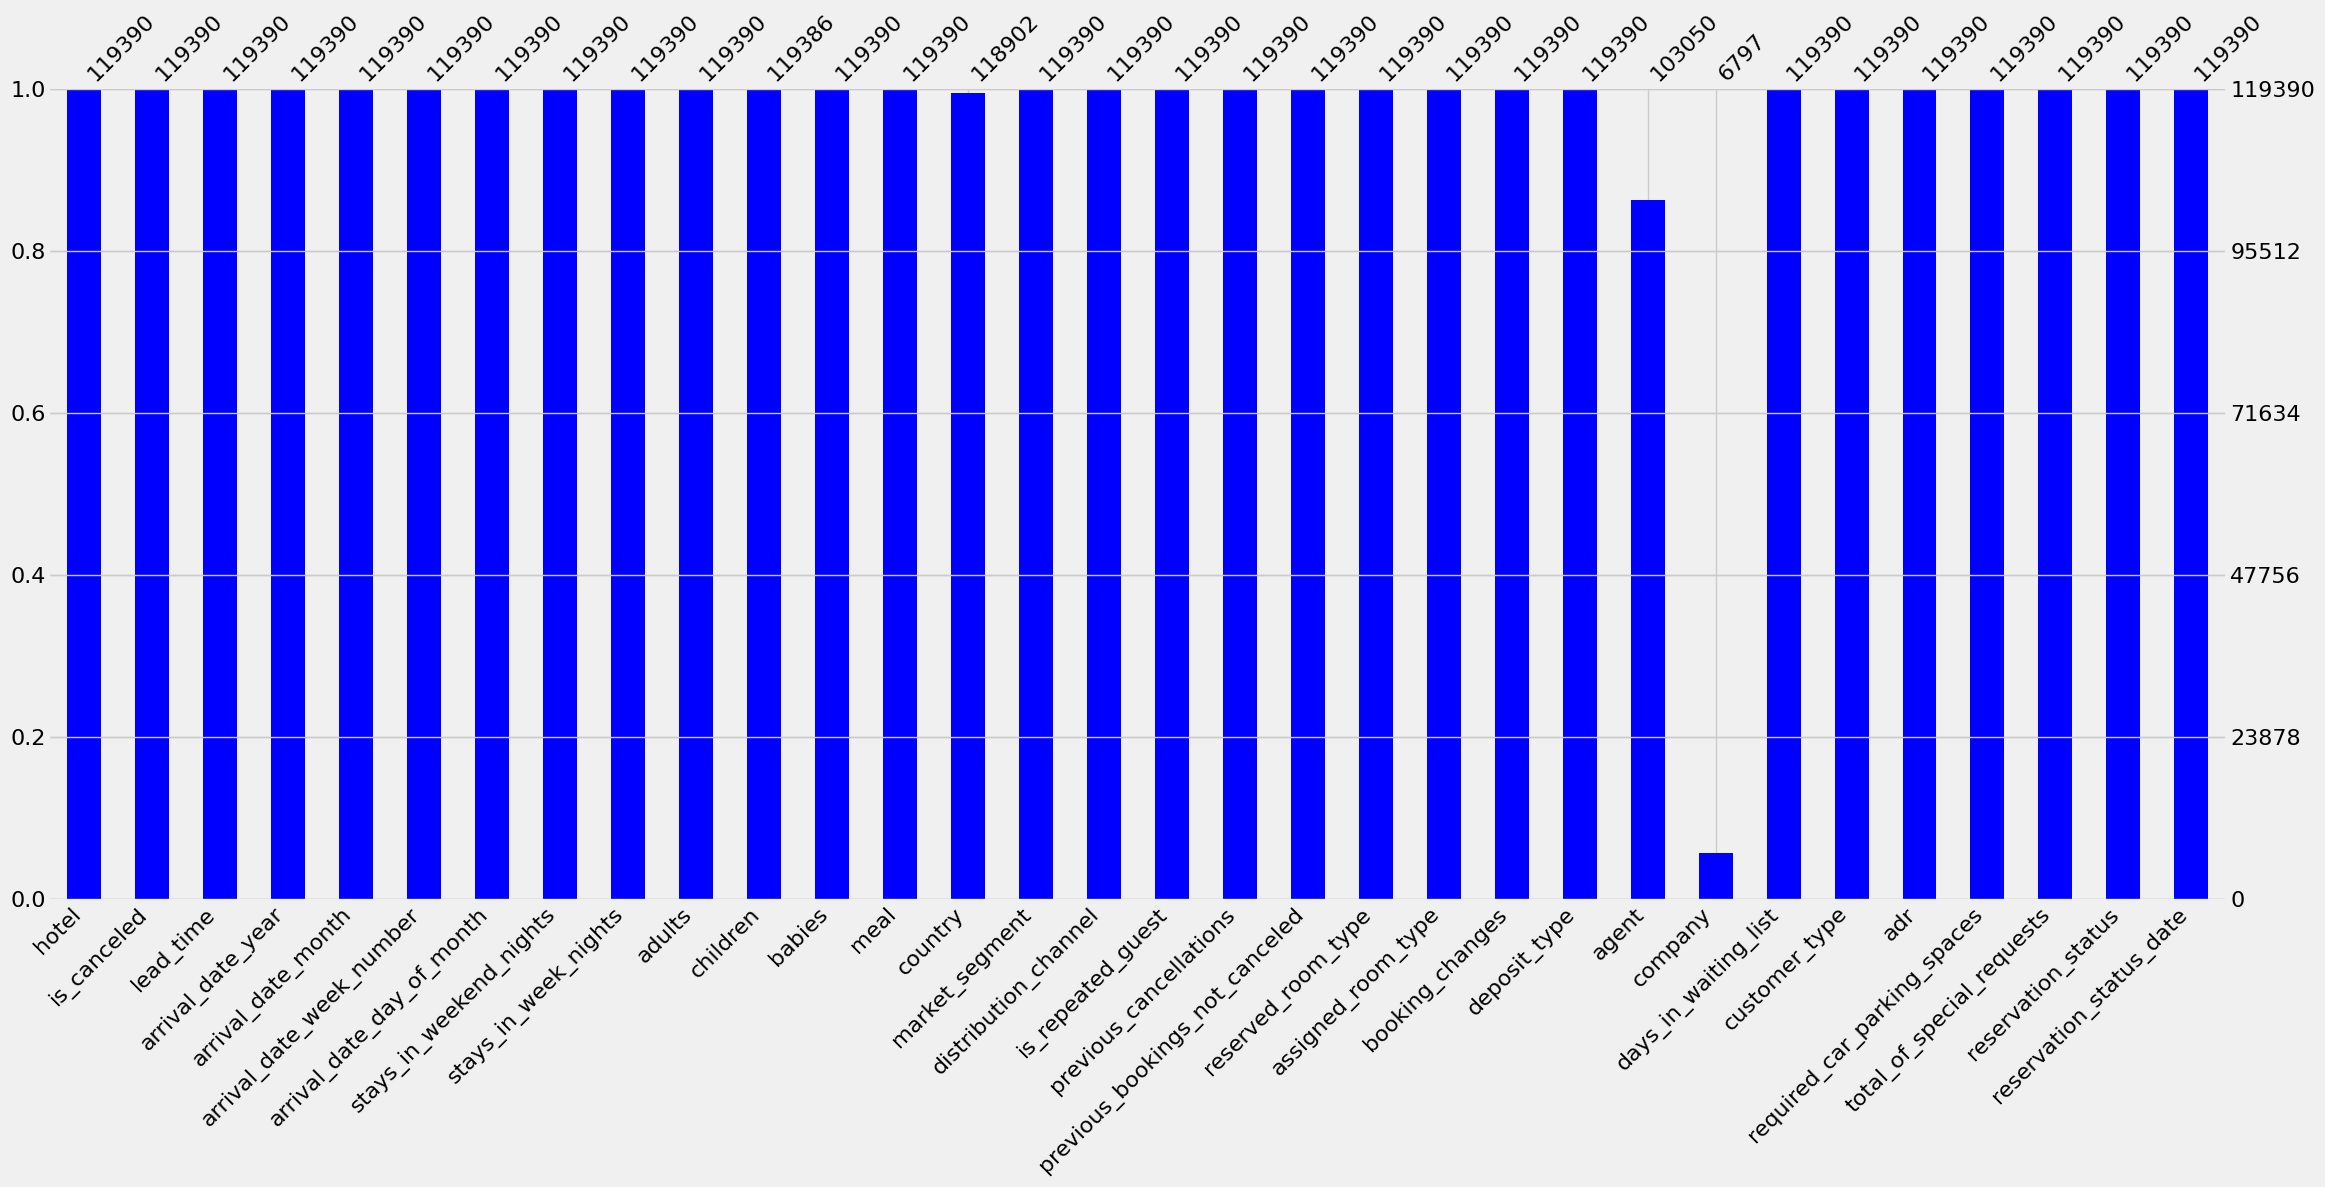

In [86]:
# missing value vis
msno.bar(hotel, color = "blue")
plt.show()

We detected that column with **children**, **country**, **agent** and **company** has missing value. <br>

1. Notice that the missing ratio of Children and Country is less than 1%, we consider to drop the missing values (rows).

In [87]:
# Drop missing value with Children and Country
hotel = hotel[hotel["country"].isnull() == False]
hotel = hotel[hotel["children"].isnull() == False]
hotel.head()

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  children  babies  \
0                        0                     0       2       0.0       0   
1                        0                     0       2       0.0       0   
2                        0                     1       1       0.0       0   
3                        0                     1       1       0.0       0   
4                        0                     2       2       0.0       0   

  meal country market_segment distribution_channel  is_repeated_guest  \
0   BB     PRT         Direct               Direct                  0   
1   BB     PRT         Direct               Direct                  0   
2   BB     GBR         Direct               Direct                  0   
3   BB     GBR      Corporate            Corporate                  0   
4   BB     GBR      Online TA                TA/TO                  0   

   previous_cancellations  previous_bookings_not_canceled reserved_room_type  \
0                       0                               0                  C   
1                       0                               0                  C   
2                       0                               0                  A   
3                       0                               0                  A   
4                       0                               0                  A   

  assigned_room_type  booking_changes deposit_type  agent  company  \
0                  C                3   No Deposit    NaN      NaN   
1                  C                4   No Deposit    NaN      NaN   
2                  C                0   No Deposit    NaN      NaN   
3                  A                0   No Deposit  304.0      NaN   
4                  A                0   No Deposit  240.0      NaN   

   days_in_waiting_list customer_type   adr  required_car_parking_spaces  \
0                     0     Transient   0.0                            0   
1                     0     Transient   0.0                            0   
2                     0     Transient  75.0                            0   
3                     0     Transient  75.0                            0   
4                     0     Transient  98.0                            0   

   total_of_special_requests reservation_status reservation_status_date  
0                          0          Check-Out                  7/1/15  
1                          0          Check-Out                  7/1/15  
2                          0          Check-Out                  7/2/15  
3                          0          Check-Out                  7/2/15  
4                          1          Check-Out                  7/3/15

2. Notice that Company has missing ratio about 94.3%, we consider drop the columns.

In [88]:
hotel.drop("company", axis = 1, inplace = True)

3. Agent (Agent fee) has missing ratio about 13.68, consider replace the missing value with:<br>
- **Zero**
- Mode
- Average

In [89]:
hotel["agent"].value_counts()

agent
9.0      31959
240.0    13871
1.0       7191
14.0      3638
7.0       3539
         ...  
70.0         1
93.0         1
54.0         1
497.0        1
59.0         1
Name: count, Length: 332, dtype: int64

In [90]:
# Consider 0, mode, average
print("Mode is:", hotel["agent"].mode())
print("Mean is:", hotel["agent"].mean())

Mode is: 0    9.0
Name: agent, dtype: float64
Mean is: 86.54553229537194


In [91]:
# Using 0
hotel["agent"].fillna(0, inplace = True)

## Special Check

### Special Check 1
For each observation, consider the counts of adults, children and babies can not be 0 at the same time, we have observed 170 anomaly cases.

In [92]:
special = (hotel["children"] == 0) & (hotel["adults"] == 0) & (hotel["babies"] == 0)
special.sum()

170

In [93]:
hotel = hotel[~ special]
hotel.shape

(118728, 31)

### Special Check 2 <br>
For adr (Average Daily Rate) can not be negative.

In [94]:
hotel['adr'].value_counts().sort_index()

adr
-6.38          1
 0.00       1799
 0.26          1
 0.50          1
 1.00         14
            ... 
 450.00        1
 451.50        1
 508.00        1
 510.00        1
 5400.00       1
Name: count, Length: 8857, dtype: int64

Max adr value is 5400, based on graph below, consider it as an anomaly value.

In [95]:
px.violin(hotel['adr'])

Remove anomaly cases

In [96]:
hotel = hotel[(hotel['adr'] >= 0)&(hotel['adr'] < 5400)]

In [97]:
px.violin(hotel['adr'])

In [98]:
hotel.head()

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  children  babies  \
0                        0                     0       2       0.0       0   
1                        0                     0       2       0.0       0   
2                        0                     1       1       0.0       0   
3                        0                     1       1       0.0       0   
4                        0                     2       2       0.0       0   

  meal country market_segment distribution_channel  is_repeated_guest  \
0   BB     PRT         Direct               Direct                  0   
1   BB     PRT         Direct               Direct                  0   
2   BB     GBR         Direct               Direct                  0   
3   BB     GBR      Corporate            Corporate                  0   
4   BB     GBR      Online TA                TA/TO                  0   

   previous_cancellations  previous_bookings_not_canceled reserved_room_type  \
0                       0                               0                  C   
1                       0                               0                  C   
2                       0                               0                  A   
3                       0                               0                  A   
4                       0                               0                  A   

  assigned_room_type  booking_changes deposit_type  agent  \
0                  C                3   No Deposit    0.0   
1                  C                4   No Deposit    0.0   
2                  C                0   No Deposit    0.0   
3                  A                0   No Deposit  304.0   
4                  A                0   No Deposit  240.0   

   days_in_waiting_list customer_type   adr  required_car_parking_spaces  \
0                     0     Transient   0.0                            0   
1                     0     Transient   0.0                            0   
2                     0     Transient  75.0                            0   
3                     0     Transient  75.0                            0   
4                     0     Transient  98.0                            0   

   total_of_special_requests reservation_status reservation_status_date  
0                          0          Check-Out                  7/1/15  
1                          0          Check-Out                  7/1/15  
2                          0          Check-Out                  7/2/15  
3                          0          Check-Out                  7/2/15  
4                          1          Check-Out                  7/3/15

In [99]:
hotel.to_csv('hotel_eda_ready.csv', index=False)

 # Exploratory Data Analysis

## 1. Cancelled and Non-cancelled vlaues

In [141]:
hotel['is_canceled'].value_counts()

is_canceled
0    74589
1    44137
Name: count, dtype: int64

<Axes: xlabel='is_canceled', ylabel='count'>

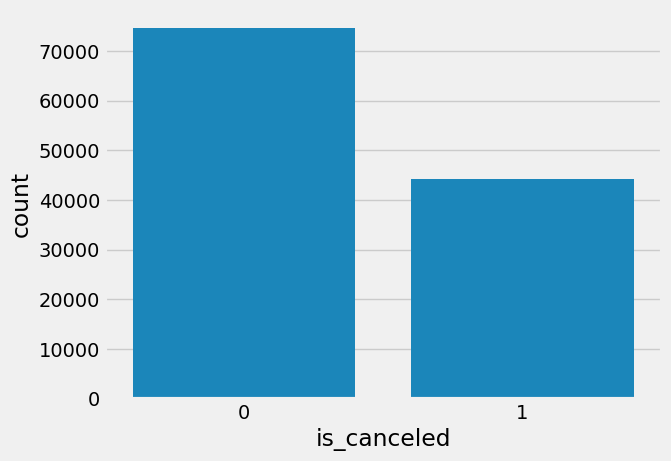

In [142]:
sns.countplot(x = "is_canceled", data = hotel)

## 2. From which countries do the customers (non-cancelled) from?

In [143]:
non = hotel[hotel['is_canceled'] == 0]

In [144]:
non_country = non['country'].value_counts().reset_index()
non_country.columns = ['country', 'non_canceled_counts']
non_country

country  non_canceled_counts
0       PRT                20977
1       GBR                 9667
2       FRA                 8468
3       ESP                 6383
4       DEU                 6067
..      ...                  ...
160     BHR                    1
161     DJI                    1
162     MLI                    1
163     NPL                    1
164     FRO                    1

[165 rows x 2 columns]

In [145]:
# vis on map
basemap = folium.Map()
guests_map = px.choropleth(non_country,
                           locations = non_country['country'],
                           color = non_country['non_canceled_counts'],
                           hover_name = non_country['country'])
guests_map.show()

Conclusion: Customers mostly come from Europe, especially from Portugal.

## 3. What is the adr (average daily rate) of each room?

In [146]:
px.box(non,
       x = "reserved_room_type",
       y = "adr",
       color = "hotel",
       template = "plotly_dark",
       category_orders={"reserved_room_type":["A","B","C","D","E","F","G","H","L"]}
       )

Conclusion: adr in each room depends on room types and standard deviation.

## 4. Annual (monthly) adr variation for two different types of hotels.


In [147]:
non_resort = non[non['hotel'] == "Resort Hotel"]
non_city = non[non['hotel'] == "City Hotel"]

In [148]:
resort_hotel = non_resort.groupby(['arrival_date_month'])['adr'].mean().reset_index()
city_hotel = non_city.groupby(['arrival_date_month'])['adr'].mean().reset_index()

In [149]:
merged_hotel = pd.merge(resort_hotel,city_hotel, on = 'arrival_date_month')
merged_hotel.columns = ['month', 'resort_adr', 'city_adr']

In [150]:
merged_hotel = sd.Sort_Dataframeby_Month(merged_hotel, "month")
merged_hotel

month  resort_adr    city_adr
0     January   48.994018   82.330983
1    February   54.468180   86.520062
2       March   57.433661   90.658533
3       April   76.176140  111.962267
4         May   76.734804  120.669827
5        June  108.133154  117.874360
6        July  150.483553  115.818019
7      August  181.348715  118.674598
8   September   96.288897  112.776582
9     October   61.932777  102.004672
10   November   48.882907   86.946178
11   December   68.634584   88.401855

In [151]:
px.line(merged_hotel, x = "month", y = ["resort_adr", "city_adr"], title = "Adr over Months", template = "plotly_dark")

Conclusion:<br>
- The price of Resort Hotel is significantly higher than that of City Hotel during the summer season.
- The price fluctuation of City Hotel is relatively smaller. The price for City Hotel are getting high form April and continue to be so until September.

## 5. KDE Plot with Adr Distribution (Resort VS City).

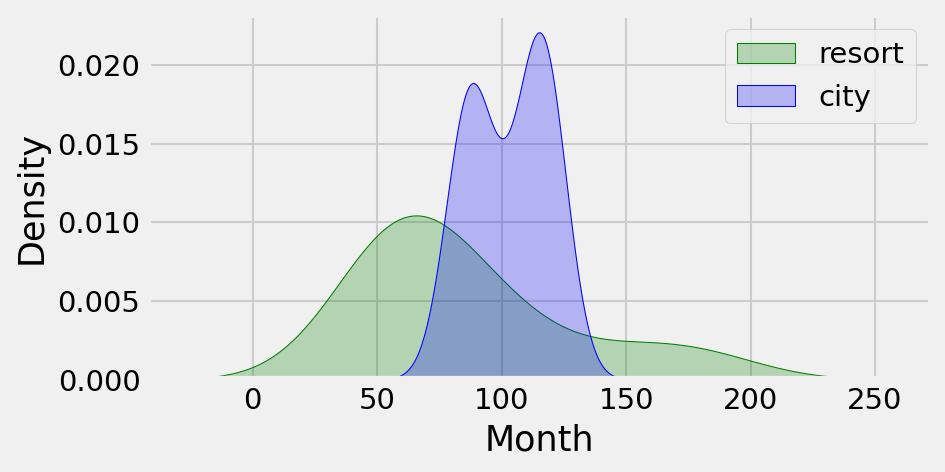

In [152]:
plt.figure(figsize=(6,3), dpi=150)
ax = sns.kdeplot(merged_hotel['resort_adr'],
                 color = "green",
                 shade = True,
                 label = 'resort')
ax = sns.kdeplot(merged_hotel['city_adr'],
                 color = "blue",
                 shade = True,
                 label = 'city')
ax.set_xlabel("Month")
ax.set_ylabel("Density")
ax.legend(['resort', 'city'])

## 6. The Most Busy Months (Resort vs City).

In [153]:
resort_guests = non_resort['arrival_date_month'].value_counts().reset_index()
resort_guests.columns = ['month', 'resort_guests']
city_guests = non_city['arrival_date_month'].value_counts().reset_index()
city_guests.columns = ['month', 'city_guests']

In [154]:
merged_guests = pd.merge(resort_guests, city_guests, on = 'month')
merged_guests = sd.Sort_Dataframeby_Month(merged_guests, "month")
merged_guests

month  resort_guests  city_guests
0     January           1812         2249
1    February           2253         3051
2       March           2516         4049
3       April           2518         4010
4         May           2523         4568
5        June           2026         4358
6        July           3110         4770
7      August           3237         5367
8   September           2077         4283
9     October           2528         4326
10   November           1937         2674
11   December           1970         2377

In [155]:
px.line(merged_guests, x = 'month', y = ['resort_guests', 'city_guests'],
        title = 'Guests per month',
        template = 'plotly_dark',)

Conclusion:
- It is evident that City Hotel has a higher number of guests compared to Resort Hotel, making it more popular.
- In City Hotel, despite high prices in July and August (as shown in the previous graph), the number of guests reaches its peak during these months.
- Both hotels experience a low number of customers in the winter season.

## 6. How long do guests stay?

In [156]:
non['total_night'] = non['stays_in_weekend_nights'] + non['stays_in_week_nights']
non.head()

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  children  babies  \
0                        0                     0       2       0.0       0   
1                        0                     0       2       0.0       0   
2                        0                     1       1       0.0       0   
3                        0                     1       1       0.0       0   
4                        0                     2       2       0.0       0   

  meal country market_segment distribution_channel  is_repeated_guest  \
0   BB     PRT         Direct               Direct                  0   
1   BB     PRT         Direct               Direct                  0   
2   BB     GBR         Direct               Direct                  0   
3   BB     GBR      Corporate            Corporate                  0   
4   BB     GBR      Online TA                TA/TO                  0   

   previous_cancellations  previous_bookings_not_canceled reserved_room_type  \
0                       0                               0                  C   
1                       0                               0                  C   
2                       0                               0                  A   
3                       0                               0                  A   
4                       0                               0                  A   

  assigned_room_type  booking_changes deposit_type  agent  \
0                  C                3   No Deposit    0.0   
1                  C                4   No Deposit    0.0   
2                  C                0   No Deposit    0.0   
3                  A                0   No Deposit  304.0   
4                  A                0   No Deposit  240.0   

   days_in_waiting_list customer_type   adr  required_car_parking_spaces  \
0                     0     Transient   0.0                            0   
1                     0     Transient   0.0                            0   
2                     0     Transient  75.0                            0   
3                     0     Transient  75.0                            0   
4                     0     Transient  98.0                            0   

   total_of_special_requests reservation_status reservation_status_date  \
0                          0          Check-Out                  7/1/15   
1                          0          Check-Out                  7/1/15   
2                          0          Check-Out                  7/2/15   
3                          0          Check-Out                  7/2/15   
4                          1          Check-Out                  7/3/15   

   total_night  
0            0  
1            0  
2            1  
3            1  
4            2

In [157]:
hotel_stay = non.groupby(['total_night', 'hotel'])['is_canceled'].count().reset_index()
hotel_stay.rename(columns = {"is_canceled" : "number of stays" }, inplace = True)
hotel_stay.head()

total_night         hotel  number of stays
0            0    City Hotel              251
1            0  Resort Hotel              366
2            1    City Hotel             9155
3            1  Resort Hotel             6368
4            2    City Hotel            10983

In [158]:
fig = px.bar(hotel_stay, x = "total_night", y = "number of stays", color = "hotel", barmode = "group")
fig.update_xaxes(range = [0,20])
fig.update_xaxes(tickmode = 'linear', tick0 = 0, dtick = 1)
fig.show()

Conclusion: <br>
- From the graph, we can observe that the highest number of stays for resort hotel is for one night, and three nights with City Hotel having significantly more stays than Resort Hotel within 5 days.
- The number of stays generally decreases as the number of nights increases for **resort hotel**, but there are notable peaks at 7 nights.
- For **City Hotel**, there is an increasing trend in the number of stays from 1 to 3 nights, suggesting a preference for short-term stays. However, beyond a 3-night stay, there is a rapid decline in the number of stays, indicating that fewer guests choose to stay for longer periods at City Hotel.

## 7. Correlation Map

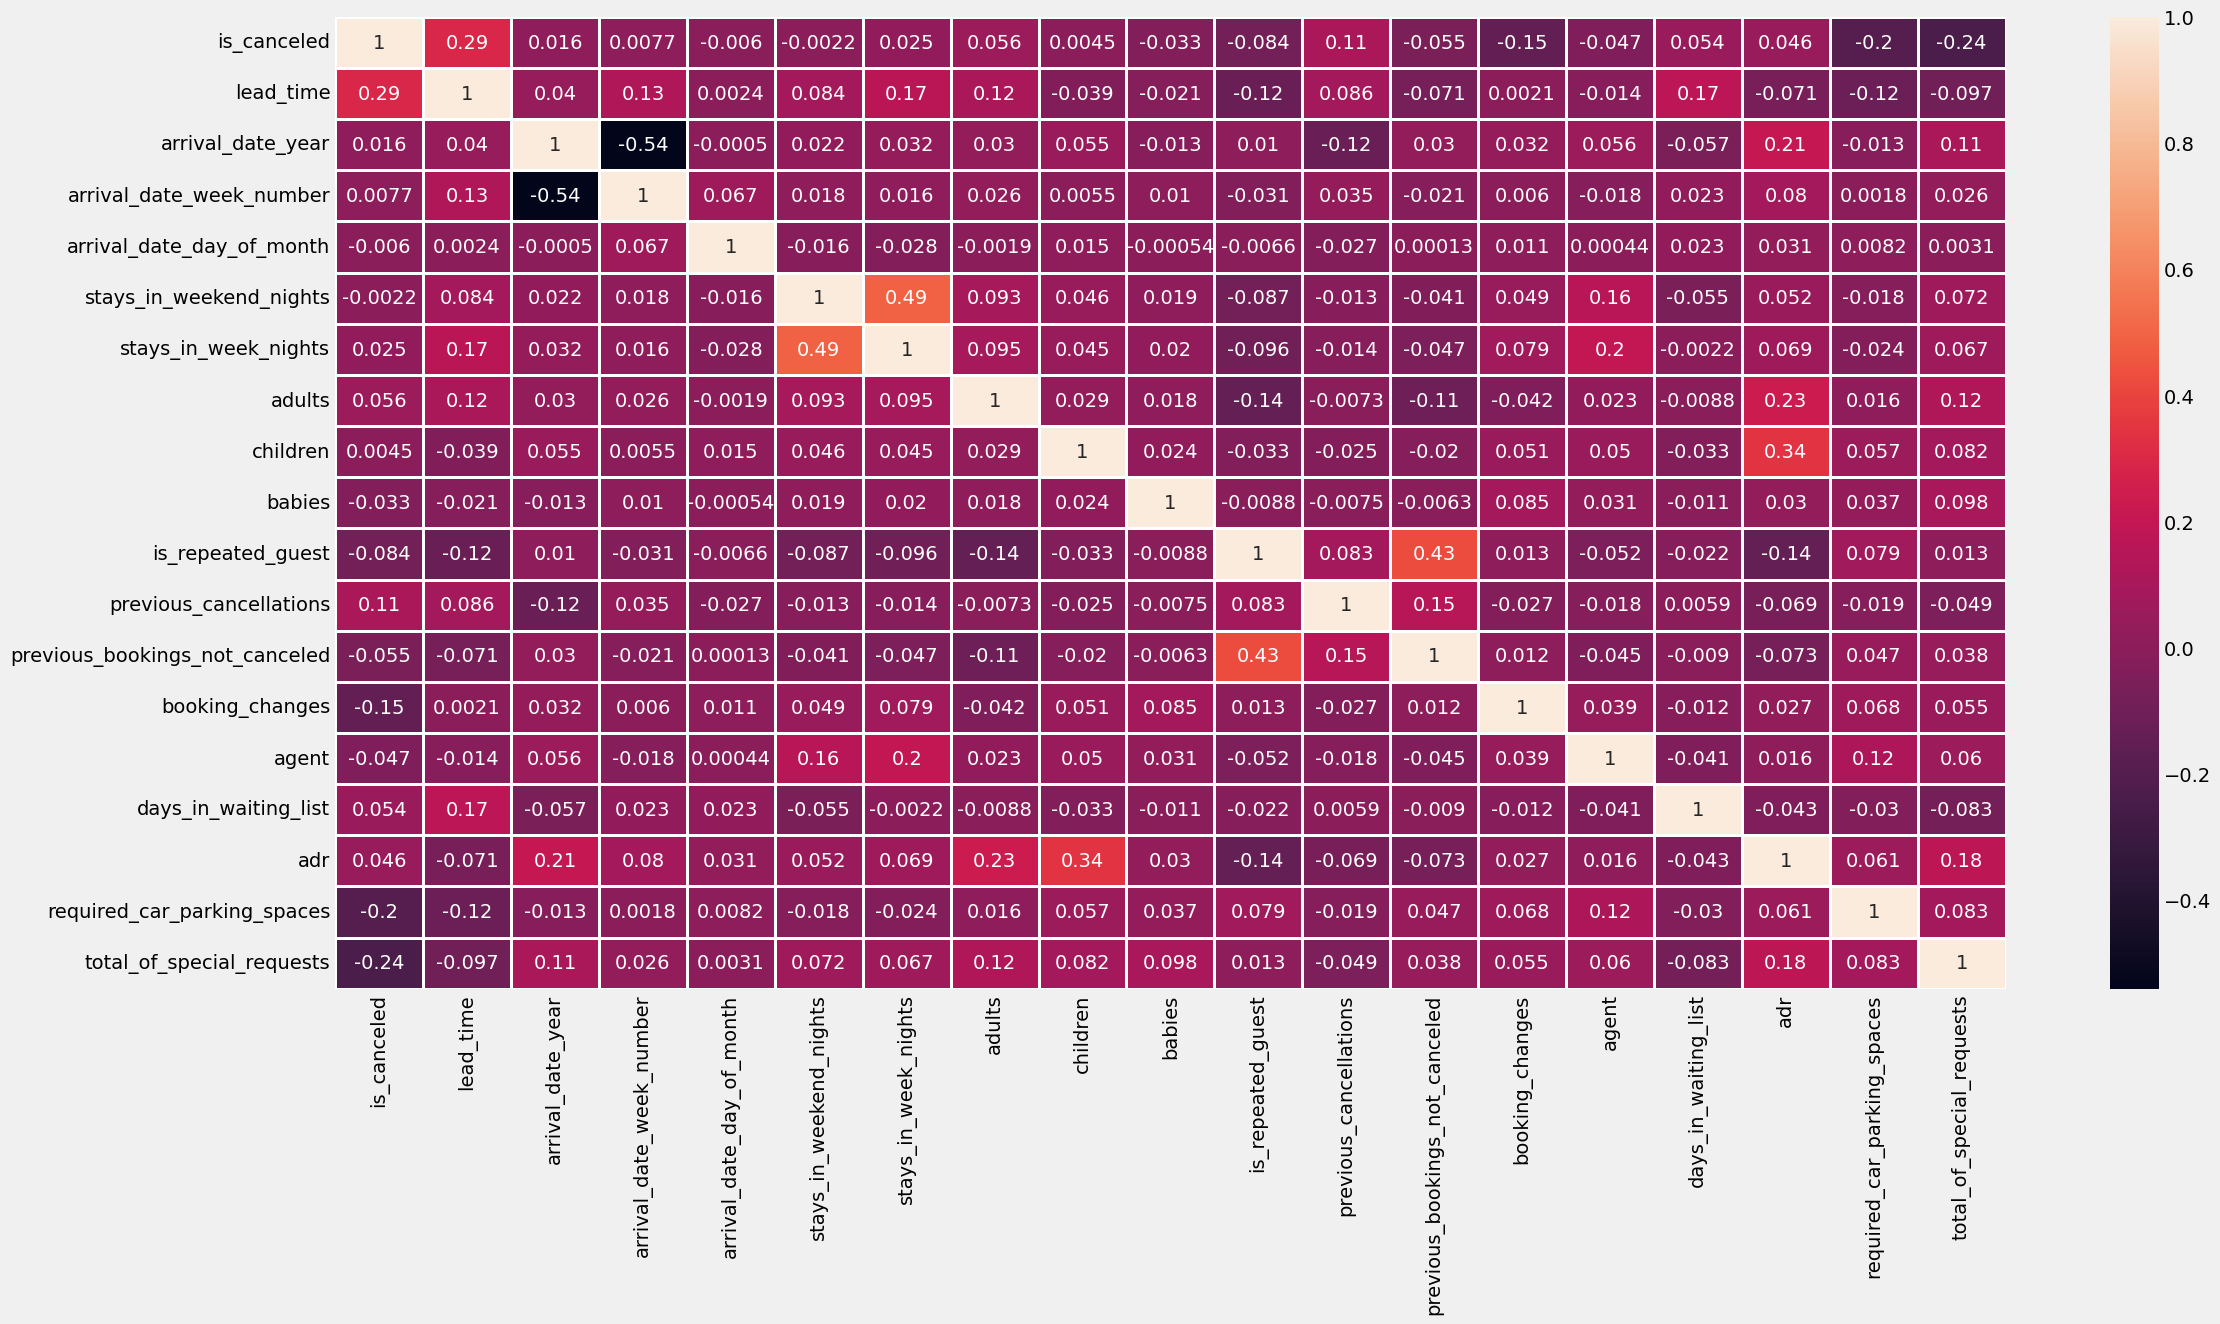

In [159]:
plt.figure(figsize = (24, 12))
# Select only the numeric columns from the DataFrame before calculating the correlation matrix.
# Select only the numeric columns
numeric_columns = hotel.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
corr = numeric_columns.corr()

sns.heatmap(corr, annot = True, linewidths = 1)
plt.show()

In [160]:
corr_with_iscanceled = numeric_columns.corr()["is_canceled"].abs().sort_values(ascending = False)
corr_with_iscanceled

is_canceled                       1.000000
lead_time                         0.291619
total_of_special_requests         0.235923
required_car_parking_spaces       0.195013
booking_changes                   0.145139
previous_cancellations            0.109911
is_repeated_guest                 0.084115
adults                            0.056129
previous_bookings_not_canceled    0.055494
days_in_waiting_list              0.054114
agent                             0.046842
adr                               0.045910
babies                            0.032605
stays_in_week_nights              0.024825
arrival_date_year                 0.016419
arrival_date_week_number          0.007668
arrival_date_day_of_month         0.006022
children                          0.004536
stays_in_weekend_nights           0.002192
Name: is_canceled, dtype: float64

# Feature Engineering

Feature selection is a crucial aspect of feature engineering, aimed at identifying the optimal subset of features. By eliminating irrelevant or redundant features, it serves to reduce the number of features, enhance the precision of the model, and decrease computational time.<br>

When dealing with a dataset that includes both continuous and categorical features and your target variable is categorical for a classification task, we should handle the feature selection process for continuous and categorical variables separately, due to the different nature of these data types.

## Categorical Variables

In [161]:
hotel.info()

<class 'pandas.core.frame.DataFrame'>
Index: 118726 entries, 0 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           118726 non-null  object 
 1   is_canceled                     118726 non-null  int64  
 2   lead_time                       118726 non-null  int64  
 3   arrival_date_year               118726 non-null  int64  
 4   arrival_date_month              118726 non-null  object 
 5   arrival_date_week_number        118726 non-null  int64  
 6   arrival_date_day_of_month       118726 non-null  int64  
 7   stays_in_weekend_nights         118726 non-null  int64  
 8   stays_in_week_nights            118726 non-null  int64  
 9   adults                          118726 non-null  int64  
 10  children                        118726 non-null  float64
 11  babies                          118726 non-null  int64  
 12  meal                 

In [162]:
cat_cols = [col for col in hotel.columns if hotel[col].dtype == "O"]
cat_cols = ["is_canceled"] + cat_cols
cat_hotel = hotel[cat_cols]
cat_hotel.dtypes

is_canceled                 int64
hotel                      object
arrival_date_month         object
meal                       object
country                    object
market_segment             object
distribution_channel       object
reserved_room_type         object
assigned_room_type         object
deposit_type               object
customer_type              object
reservation_status         object
reservation_status_date    object
dtype: object

### 1. Special Feature Encoder
Converte 'reservation_status_date' to datetime: ryear, rmonth, rday <br>

In [163]:
cat_hotel['reservation_status_date'] = pd.to_datetime(cat_hotel['reservation_status_date'])

cat_hotel['ryear'] = cat_hotel['reservation_status_date'].dt.year
cat_hotel['rmonth'] = cat_hotel['reservation_status_date'].dt.month
cat_hotel['rday'] = cat_hotel['reservation_status_date'].dt.day

cat_hotel.drop(['reservation_status_date'], axis=1, inplace=True)
cat_hotel.head()

is_canceled         hotel arrival_date_month meal country market_segment  \
0            0  Resort Hotel               July   BB     PRT         Direct   
1            0  Resort Hotel               July   BB     PRT         Direct   
2            0  Resort Hotel               July   BB     GBR         Direct   
3            0  Resort Hotel               July   BB     GBR      Corporate   
4            0  Resort Hotel               July   BB     GBR      Online TA   

  distribution_channel reserved_room_type assigned_room_type deposit_type  \
0               Direct                  C                  C   No Deposit   
1               Direct                  C                  C   No Deposit   
2               Direct                  A                  C   No Deposit   
3            Corporate                  A                  A   No Deposit   
4                TA/TO                  A                  A   No Deposit   

  customer_type reservation_status  ryear  rmonth  rday  
0     Transient          Check-Out   2015       7     1  
1     Transient          Check-Out   2015       7     1  
2     Transient          Check-Out   2015       7     2  
3     Transient          Check-Out   2015       7     2  
4     Transient          Check-Out   2015       7     3

### 2. Feature Encoder

Showing unique values for each category columns

In [164]:
for col in cat_hotel.columns:
  print(f"{col}: \n{cat_hotel[col].unique()}\n")

is_canceled: 
[0 1]

hotel: 
['Resort Hotel' 'City Hotel']

arrival_date_month: 
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']

meal: 
['BB' 'FB' 'HB' 'SC' 'Undefined']

country: 
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' 'ROU' 'NOR' 'OMN' 'ARG' 'POL' 'DEU'
 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST' 'CZE'
 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR' 'UKR'
 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO' 'ISR'
 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM' 'HRV'
 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY' 'KWT'
 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN' 'SYC'
 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB' 'CMR'
 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'JOR' 'SYR' 'SGP' 'BDI' 'SAU'
 'VNM' 'PLW' 'QAT' 'EGY' 'PER' 'MLT' 'MWI' 'ECU' 'MDG' 'ISL' 'UZB' 'NPL'
 'BHS' 'MAC' 'TGO' 'TWN'

In [165]:
cat_hotel_encoded = pd.DataFrame()

cat_hotel_encoded['is_canceled'] = cat_hotel['is_canceled']
cat_hotel_encoded['hotel'] = cat_hotel['hotel'].map({'Resort Hotel': 0,
                                             'City Hotel': 1})

cat_hotel_encoded['arrival_date_month'] = cat_hotel['arrival_date_month'].map({'July': 7,
                                                                       'August': 8,
                                                                       'September': 9,
                                                                       'October': 10,
                                                                       'November': 11,
                                                                       'December': 12,
                                                                       'January': 1,
                                                                       'February': 2,
                                                                       'March': 3,
                                                                       'April': 4,
                                                                       'May': 5,
                                                                       'June': 6})
cols  = ['meal', 'country', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'deposit_type', 'customer_type', 'reservation_status', 'ryear']

for col in cols:
  cat_hotel_encoded[col] = label_encoder.fit_transform(cat_hotel[col])

cat_hotel_encoded['rmonth'] = cat_hotel['rmonth']
cat_hotel_encoded['rday'] = cat_hotel['rday']

cat_hotel_encoded

is_canceled  hotel  arrival_date_month  meal  country  market_segment  \
0                 0      0                   7     0      135               3   
1                 0      0                   7     0      135               3   
2                 0      0                   7     0       59               3   
3                 0      0                   7     0       59               2   
4                 0      0                   7     0       59               6   
...             ...    ...                 ...   ...      ...             ...   
119385            0      1                   8     0       15               5   
119386            0      1                   8     0       56               6   
119387            0      1                   8     0       43               6   
119388            0      1                   8     0       59               6   
119389            0      1                   8     2       43               6   

        distribution_channel  reserved_room_type  assigned_room_type  \
0                          1                   2                   2   
1                          1                   2                   2   
2                          1                   0                   2   
3                          0                   0                   0   
4                          3                   0                   0   
...                      ...                 ...                 ...   
119385                     3                   0                   0   
119386                     3                   4                   4   
119387                     3                   3                   3   
119388                     3                   0                   0   
119389                     3                   0                   0   

        deposit_type  customer_type  reservation_status  ryear  rmonth  rday  
0                  0              2                   1      1       7     1  
1                  0              2                   1      1       7     1  
2                  0              2                   1      1       7     2  
3                  0              2                   1      1       7     2  
4                  0              2                   1      1       7     3  
...              ...            ...                 ...    ...     ...   ...  
119385             0              2                   1      3       9     6  
119386             0              2                   1      3       9     7  
119387             0              2                   1      3       9     7  
119388             0              2                   1      3       9     7  
119389             0              2                   1      3       9     7  

[118726 rows x 15 columns]

### 3. Categorical Feature Selection with Cramers V

In [166]:
def cal_cramers_v(v1,v2):
    crosstab = np.array(pd.crosstab(v1,v2,rownames=None,colnames=None))
    stat = chi2_contingency(crosstab)[0]
    obs = np.sum(crosstab)
    mini = min(crosstab.shape) - 1
    return stat / (obs * mini)

In [167]:
rows = []
for v1 in cat_hotel_encoded:
    col = []
    for v2 in cat_hotel_encoded:
        cramers = cal_cramers_v(cat_hotel_encoded[v1],cat_hotel_encoded[v2])
        col.append(round(cramers, 2))
    rows.append(col)

In [168]:
cramers_results = np.array(rows)

cramerv_matrix = pd.DataFrame(cramers_results,
                              columns=cat_hotel_encoded.columns,
                              index=cat_hotel_encoded.columns)
cramerv_matrix.head()

is_canceled  hotel  arrival_date_month  meal  country  \
is_canceled                1.00   0.02                0.00  0.00     0.13   
hotel                      0.02   1.00                0.00  0.10     0.09   
arrival_date_month         0.00   0.00                1.00  0.01     0.01   
meal                       0.00   0.10                0.01  1.00     0.02   
country                    0.13   0.09                0.01  0.02     1.00   

                    market_segment  distribution_channel  reserved_room_type  \
is_canceled                   0.07                  0.03                0.01   
hotel                         0.02                  0.03                0.11   
arrival_date_month            0.01                  0.00                0.00   
meal                          0.04                  0.01                0.01   
country                       0.04                  0.01                0.01   

                    assigned_room_type  deposit_type  customer_type  \
is_canceled                       0.04          0.23           0.02   
hotel                             0.15          0.03           0.00   
arrival_date_month                0.00          0.01           0.01   
meal                              0.01          0.01           0.02   
country                           0.01          0.10           0.02   

                    reservation_status  ryear  rmonth  rday  
is_canceled                       1.00   0.02    0.03  0.02  
hotel                             0.02   0.00    0.00  0.00  
arrival_date_month                0.00   0.10    0.39  0.00  
meal                              0.00   0.01    0.01  0.00  
country                           0.07   0.03    0.01  0.00

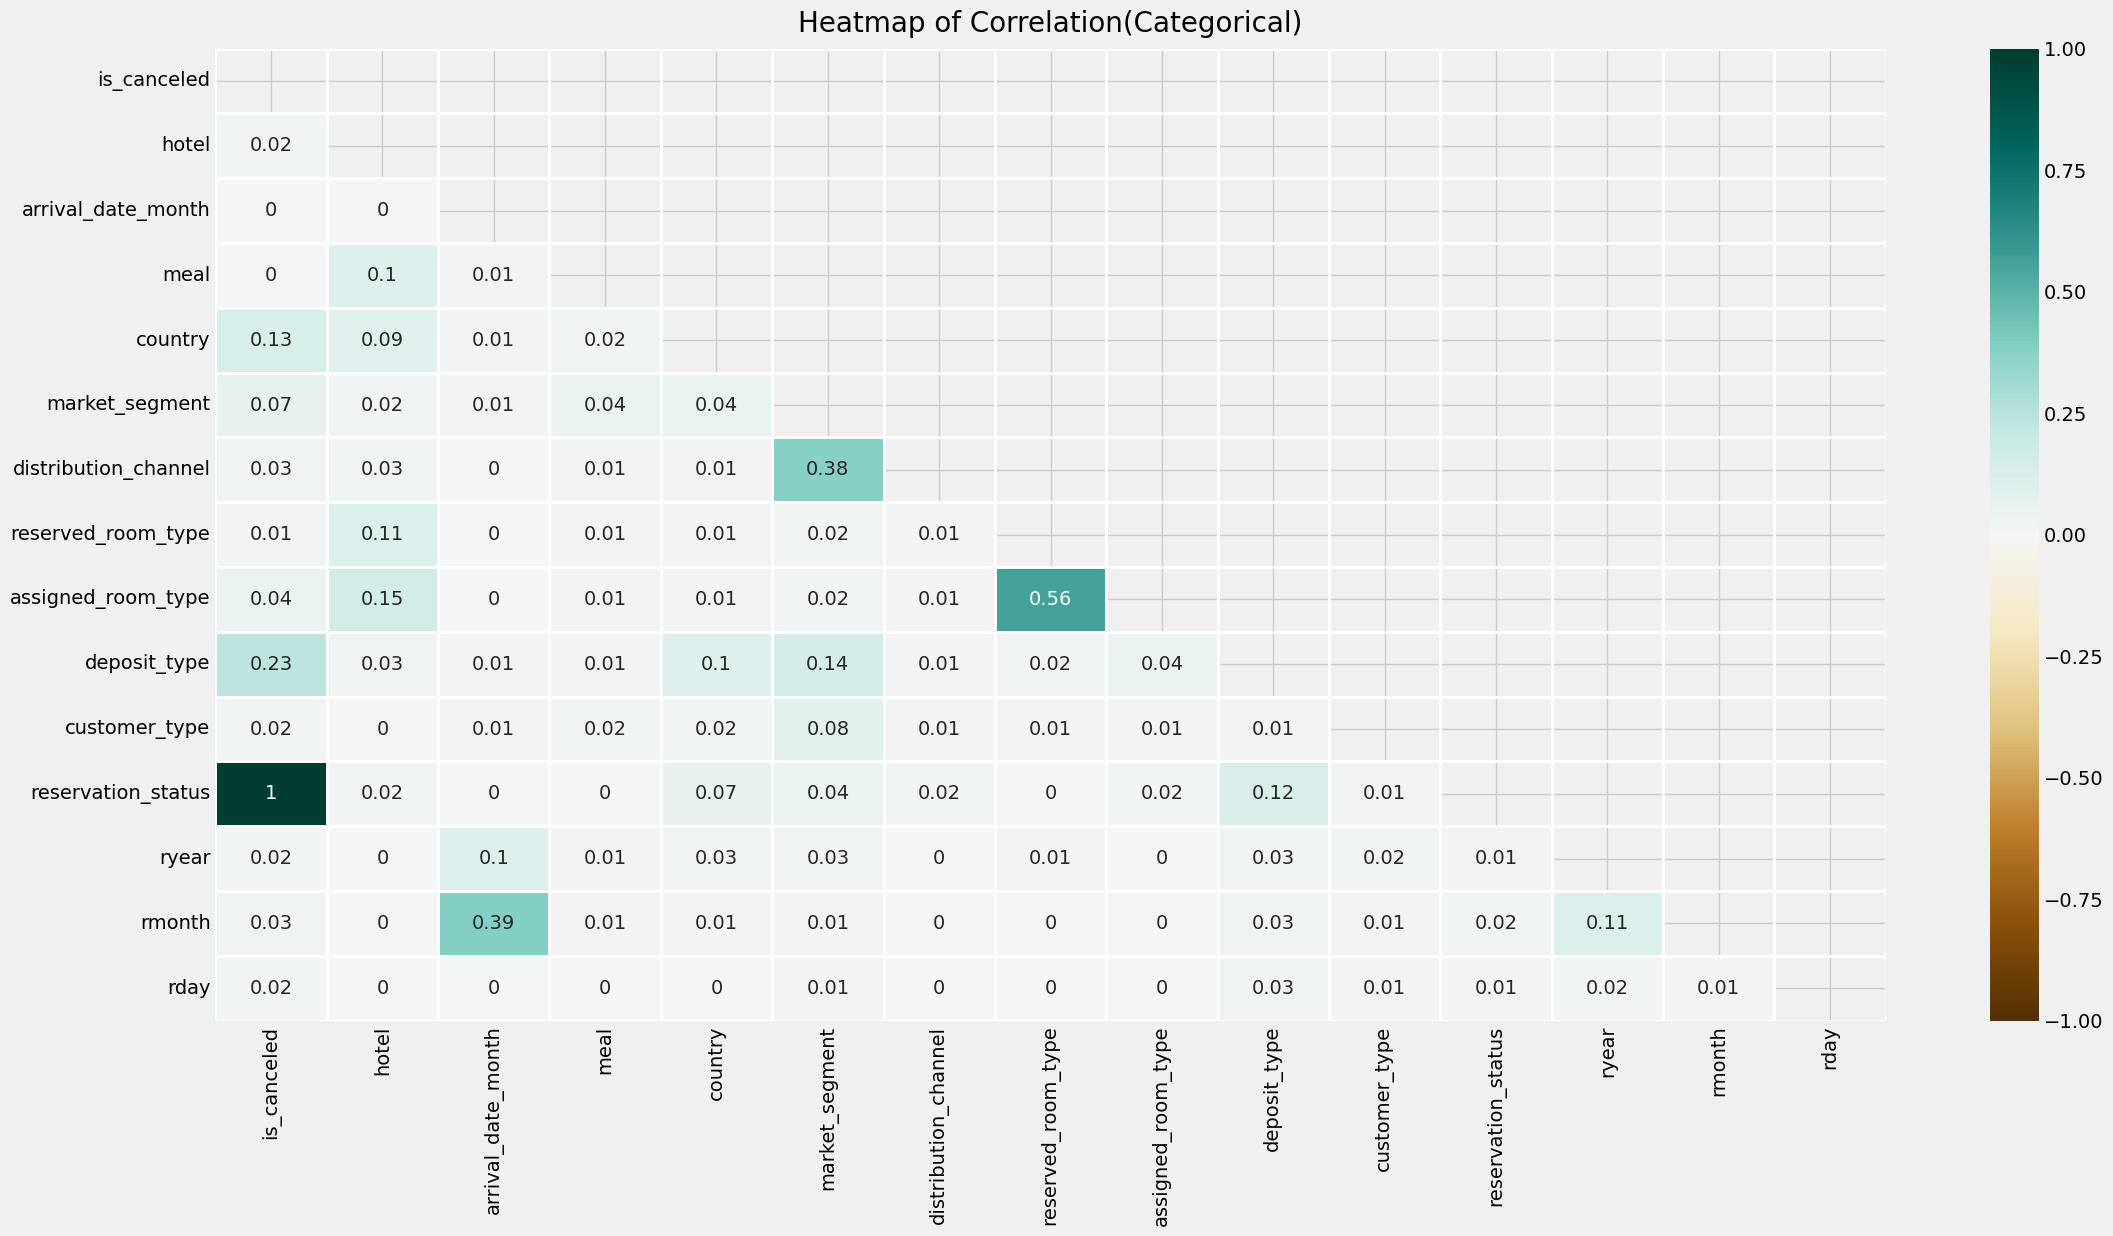

In [169]:
plt.figure(figsize = (24, 12))
mask = np.triu(np.ones_like(cramerv_matrix, dtype=np.bool_))
cat_heatmap = sns.heatmap(cramerv_matrix, mask = mask, vmin = -1, vmax = 1, annot = True, linewidths = 1, cmap = "BrBG")

cat_heatmap.set_title("Heatmap of Correlation(Categorical)", fontdict = {"fontsize": 20}, pad = 12)
plt.show()

Consider following thresholds:

- 𝑉<0.1     : negligible
- 0.1<𝑉<0.2 : weak
- 0.2<𝑉<0.4 : moderate
- 0.4<𝑉<0.6 : relatively strong
- 0.6<𝑉<0.8 : strong
- 𝑉>0.8     : very strong

**Conclusion:** <br>

With target value:
- Association bwtween 'reservation status' and target value are very strong, consider drop **'reservation status'**.
- **'arrival_date_month' and 'meal'** has negligible relation with target value, consider drop both.

Between features:
- 'arrival_date_month' and 'rmonth' are moderate.
- 'market_segment' and 'distribution_channel' are moderate.
- 'reserved_room_type' and 'assigned_room_type' are relatively strong, consider drop **'assigned_room_type'**.

**Summary**: For categorical values, we **droped** 'reservation_status_date' ( in Special Feature Encoder section ), 'reservation status', 'arrival_date_month', 'meal','assigned_room_type'. **Added** 'ryear', 'rmonth', 'rday'.

In [170]:
cat_hotel_encoded.drop(['arrival_date_month', 'assigned_room_type', 'reservation_status', 'country', 'meal'], axis = 1, inplace = True)
cat_hotel_encoded

is_canceled  hotel  market_segment  distribution_channel  \
0                 0      0               3                     1   
1                 0      0               3                     1   
2                 0      0               3                     1   
3                 0      0               2                     0   
4                 0      0               6                     3   
...             ...    ...             ...                   ...   
119385            0      1               5                     3   
119386            0      1               6                     3   
119387            0      1               6                     3   
119388            0      1               6                     3   
119389            0      1               6                     3   

        reserved_room_type  deposit_type  customer_type  ryear  rmonth  rday  
0                        2             0              2      1       7     1  
1                        2             0              2      1       7     1  
2                        0             0              2      1       7     2  
3                        0             0              2      1       7     2  
4                        0             0              2      1       7     3  
...                    ...           ...            ...    ...     ...   ...  
119385                   0             0              2      3       9     6  
119386                   4             0              2      3       9     7  
119387                   3             0              2      3       9     7  
119388                   0             0              2      3       9     7  
119389                   0             0              2      3       9     7  

[118726 rows x 10 columns]

## Continuous Variables

In [171]:
cat_cols

['is_canceled',
 'hotel',
 'arrival_date_month',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'assigned_room_type',
 'deposit_type',
 'customer_type',
 'reservation_status',
 'reservation_status_date']

In [172]:
num_hotel = hotel.drop(cat_cols, axis = 1)

# Drop duplicate with category variable
num_hotel.drop(['arrival_date_year'], axis = 1, inplace = True)

# Re-encoder the target value for better analysis
num_hotel['canceled']=hotel['is_canceled']
num_hotel['non_canceled'] = hotel['is_canceled'].apply(lambda x: 1 if x == 0 else 0)
num_hotel

lead_time  arrival_date_week_number  arrival_date_day_of_month  \
0             342                        27                          1   
1             737                        27                          1   
2               7                        27                          1   
3              13                        27                          1   
4              14                        27                          1   
...           ...                       ...                        ...   
119385         23                        35                         30   
119386        102                        35                         31   
119387         34                        35                         31   
119388        109                        35                         31   
119389        205                        35                         29   

        stays_in_weekend_nights  stays_in_week_nights  adults  children  \
0                             0                     0       2       0.0   
1                             0                     0       2       0.0   
2                             0                     1       1       0.0   
3                             0                     1       1       0.0   
4                             0                     2       2       0.0   
...                         ...                   ...     ...       ...   
119385                        2                     5       2       0.0   
119386                        2                     5       3       0.0   
119387                        2                     5       2       0.0   
119388                        2                     5       2       0.0   
119389                        2                     7       2       0.0   

        babies  is_repeated_guest  previous_cancellations  \
0            0                  0                       0   
1            0                  0                       0   
2            0                  0                       0   
3            0                  0                       0   
4            0                  0                       0   
...        ...                ...                     ...   
119385       0                  0                       0   
119386       0                  0                       0   
119387       0                  0                       0   
119388       0                  0                       0   
119389       0                  0                       0   

        previous_bookings_not_canceled  booking_changes  agent  \
0                                    0                3    0.0   
1                                    0                4    0.0   
2                                    0                0    0.0   
3                                    0                0  304.0   
4                                    0                0  240.0   
...                                ...              ...    ...   
119385                               0                0  394.0   
119386                               0                0    9.0   
119387                               0                0    9.0   
119388                               0                0   89.0   
119389                               0                0    9.0   

        days_in_waiting_list     adr  required_car_parking_spaces  \
0                          0    0.00                            0   
1                          0    0.00                            0   
2                          0   75.00                            0   
3                          0   75.00                            0   
4                          0   98.00                            0   
...                      ...     ...                          ...   
119385                     0   96.14                            0   
119386                     0  225.43                            0   
119387                     0  157.71                            0   
11

### 1. Pearson Correlation Coefficient:

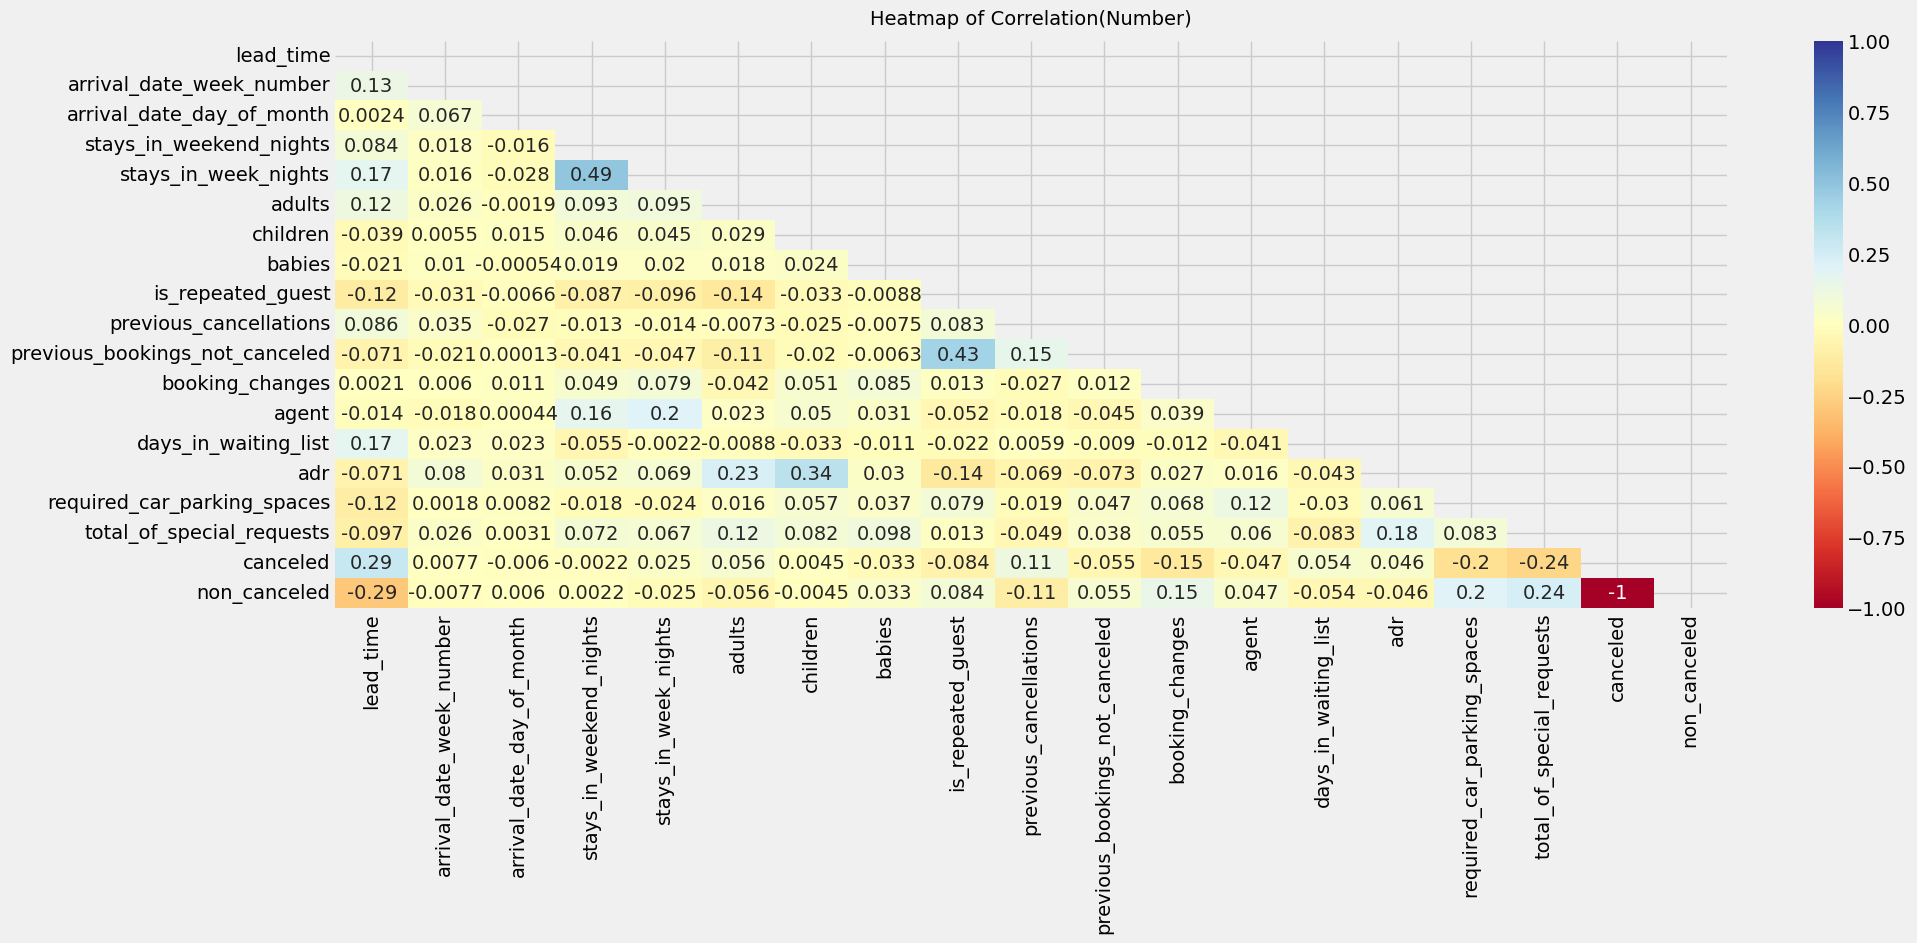

In [173]:
num_corr = num_hotel.corr()
plt.figure(figsize = (20,7))

mask = np.triu(np.ones_like(num_corr, dtype=np.bool_))
heatmap_number = sns.heatmap(num_corr,
                             mask= mask,
                             vmin=-1,
                             vmax=1,
                             annot=True,
                             cmap="RdYlBu")
heatmap_number.set_title("Heatmap of Correlation(Number)", fontdict={"fontsize": 14}, pad=12)
plt.show()

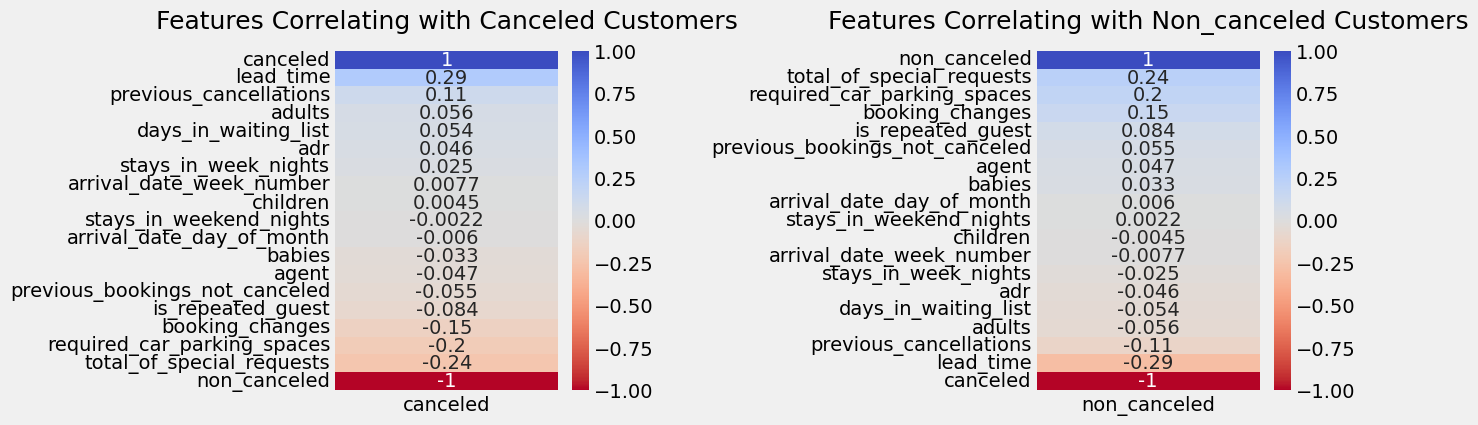

In [174]:
fig, ax = plt.subplots(ncols=2, figsize=(15,6))

heatmap = sns.heatmap(num_corr[['canceled']].sort_values(by='canceled', ascending=False),
                     ax=ax[0],
                     vmin=-1,
                     vmax=1,
                     annot=True,
                     cmap="coolwarm_r")
heatmap.set_title("Features Correlating with Canceled Customers",fontdict={"fontsize":18}, pad=16);

heatmap = sns.heatmap(num_corr[['non_canceled']].sort_values(by='non_canceled', ascending=False),
                     ax=ax[1],
                     vmin=-1,
                     vmax=1,
                     annot=True,
                     cmap="coolwarm_r")
heatmap.set_title("Features Correlating with Non_canceled Customers",fontdict={"fontsize":18}, pad=16);

fig.tight_layout(pad=5)

plt.show()

± 0.50 and ± 1: strong correlation <br>
± 0.30 and ± 0.49: medium correlation <br>
Below + 0. 29: small correlation.

Conclusion:<br>
Between features:<br>
- "stays_in_weekend_nights" and "stays_in_week_nights" has medium correlation.
- "is_repeated_guest" and "previous_bookings_not_canceled" has medium correlation.

Between features and target value:<br>
- **"stays_in_week_nights","arrival_date_week_number","children","stay_in_weekend_nights","arrival_date_day_of_month"** have extremely low correlations, consider to drop.

Summary:<br>

For continuous variable, we consider to drop: "stays_in_week_nights","arrival_date_week_number","children","stay_in_weekend_nights","arrival_date_day_of_month" and 'arrival_date_year'.




### 2. Log transformation & Variance

In [175]:
num_hotel.drop(columns = ["stays_in_week_nights","arrival_date_week_number",
                          "children","stays_in_weekend_nights","arrival_date_day_of_month",
                          'canceled', 'non_canceled'], axis = 1, inplace = True)
var_df = num_hotel.var().reset_index()
var_df.columns = ['columns', 'variance']
var_df.style.background_gradient(cmap = "ocean_r")

In [176]:
log_col = ['lead_time', 'agent', 'days_in_waiting_list', 'adr']
for col in log_col:
  num_hotel[col] = np.log(num_hotel[col] + 1)
num_hotel.head()

lead_time  adults  babies  is_repeated_guest  previous_cancellations  \
0   5.837730       2       0                  0                       0   
1   6.603944       2       0                  0                       0   
2   2.079442       1       0                  0                       0   
3   2.639057       1       0                  0                       0   
4   2.708050       2       0                  0                       0   

   previous_bookings_not_canceled  booking_changes     agent  \
0                               0                3  0.000000   
1                               0                4  0.000000   
2                               0                0  0.000000   
3                               0                0  5.720312   
4                               0                0  5.484797   

   days_in_waiting_list       adr  required_car_parking_spaces  \
0                   0.0  0.000000                            0   
1                   0.0  0.000000                            0   
2                   0.0  4.330733                            0   
3                   0.0  4.330733                            0   
4                   0.0  4.595120                            0   

   total_of_special_requests  
0                          0  
1                          0  
2                          0  
3                          0  
4                          1

In [177]:
model_hotel = pd.concat([cat_hotel_encoded, num_hotel], axis = 1)
model_hotel.head()

is_canceled  hotel  market_segment  distribution_channel  \
0            0      0               3                     1   
1            0      0               3                     1   
2            0      0               3                     1   
3            0      0               2                     0   
4            0      0               6                     3   

   reserved_room_type  deposit_type  customer_type  ryear  rmonth  rday  \
0                   2             0              2      1       7     1   
1                   2             0              2      1       7     1   
2                   0             0              2      1       7     2   
3                   0             0              2      1       7     2   
4                   0             0              2      1       7     3   

   lead_time  adults  babies  is_repeated_guest  previous_cancellations  \
0   5.837730       2       0                  0                       0   
1   6.603944       2       0                  0                       0   
2   2.079442       1       0                  0                       0   
3   2.639057       1       0                  0                       0   
4   2.708050       2       0                  0                       0   

   previous_bookings_not_canceled  booking_changes     agent  \
0                               0                3  0.000000   
1                               0                4  0.000000   
2                               0                0  0.000000   
3                               0                0  5.720312   
4                               0                0  5.484797   

   days_in_waiting_list       adr  required_car_parking_spaces  \
0                   0.0  0.000000                            0   
1                   0.0  0.000000                            0   
2                   0.0  4.330733                            0   
3                   0.0  4.330733                            0   
4                   0.0  4.595120                            0   

   total_of_special_requests  
0                          0  
1                          0  
2                          0  
3                          0  
4                          1

# Modelling

## 1. Split train & test, Balance Target Values

In [178]:
X = model_hotel.iloc[:, 1:]
y = model_hotel['is_canceled']

In [179]:
print(X.shape)
print(y.shape)

(118726, 21)
(118726,)


In [180]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 412)

In [181]:
#SMOTE, balance canceled/non-canceled customer
sm = SMOTE(sampling_strategy="minority", k_neighbors=20, random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

## 2. Logistic Regression (Base line)

In [182]:
lr = LogisticRegression()
lr.fit(X_train_res, y_train_res)

y_pred_lr = lr.predict(X_test)

acc_lr = accuracy_score(y_test, y_pred_lr)
conf = confusion_matrix(y_test, y_pred_lr)
clf_report = classification_report(y_test, y_pred_lr)

print(f"Accuracy Score of Logistic Regression is : {acc_lr}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Logistic Regression is : 0.7729722900699065
Confusion Matrix : 
[[12114  2855]
 [ 2536  6241]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.83      0.81      0.82     14969
           1       0.69      0.71      0.70      8777

    accuracy                           0.77     23746
   macro avg       0.76      0.76      0.76     23746
weighted avg       0.77      0.77      0.77     23746



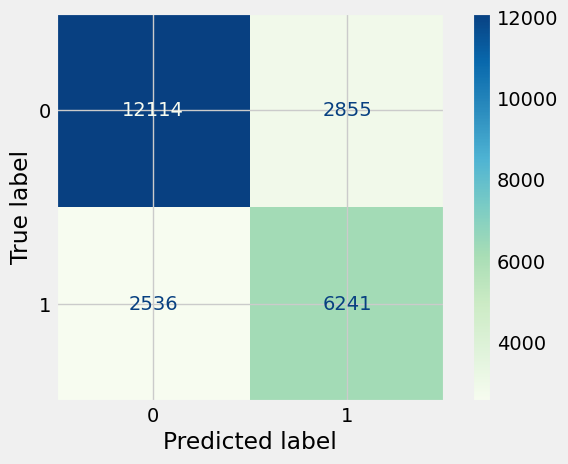

In [183]:
# Confusion Matrix
classes = ["0","1"]

disp = ConfusionMatrixDisplay(confusion_matrix=conf, display_labels=classes)
disp.plot(
    include_values=True,
    cmap="GnBu",
    ax=None,
    xticks_rotation="horizontal",
    values_format="d"
)

plt.show()

## 3. KNN model

In [184]:
knn = KNeighborsClassifier()
knn.fit(X_train_res, y_train_res)

y_pred= knn.predict(X_test)

acc_knn = accuracy_score(y_test, y_pred)
conf = confusion_matrix(y_test, y_pred)
clf_report = classification_report(y_test, y_pred)

## 4. Decision Trees

In [185]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train_res, y_train_res)

y_pred_dtc = dtc.predict(X_test)

acc_dtc = accuracy_score(y_test, y_pred_dtc)
conf = confusion_matrix(y_test, y_pred_dtc)
clf_report = classification_report(y_test, y_pred_dtc)

## 5. Random Forest


In [186]:
rd_clf = RandomForestClassifier()
rd_clf.fit(X_train_res, y_train_res)

y_pred_rd_clf = rd_clf.predict(X_test)

acc_rd_clf = accuracy_score(y_test, y_pred_rd_clf)
conf = confusion_matrix(y_test, y_pred_rd_clf)
clf_report = classification_report(y_test, y_pred_rd_clf)

## 6. Adaboost

In [187]:
ada = AdaBoostClassifier(base_estimator = dtc)
ada.fit(X_train_res, y_train_res)

y_pred_ada = ada.predict(X_test)

acc_ada = accuracy_score(y_test, y_pred_ada)
conf = confusion_matrix(y_test, y_pred_ada)
clf_report = classification_report(y_test, y_pred_ada)
clf_report

'              precision    recall  f1-score   support\n\n           0       0.91      0.89      0.90     14969\n           1       0.82      0.85      0.83      8777\n\n    accuracy                           0.87     23746\n   macro avg       0.86      0.87      0.87     23746\nweighted avg       0.88      0.87      0.87     23746\n'

## 7. Gradient Boosting Classifier

In [188]:
gb = GradientBoostingClassifier()
gb.fit(X_train_res, y_train_res)

y_pred_gb = gb.predict(X_test)

acc_gb = accuracy_score(y_test, y_pred_gb)
conf = confusion_matrix(y_test, y_pred_gb)
clf_report = classification_report(y_test, y_pred_gb)

## 8. XGBoost

In [189]:
xgb = XGBClassifier(booster='gbtree',
                    learning_rate=0.1,
                    max_depth=5,
                    n_estimators=180)

xgb.fit(X_train_res, y_train_res)

y_pred_xgb = xgb.predict(X_test)

acc_xgb = accuracy_score(y_test, y_pred_xgb)
conf = confusion_matrix(y_test, y_pred_xgb)
clf_report = classification_report(y_test, y_pred_xgb)

## 9. CatBoost


In [190]:
cat = CatBoostClassifier(iterations=100)
cat.fit(X_train_res, y_train_res)

y_pred_cat = cat.predict(X_test)

acc_cat = accuracy_score(y_test, y_pred_cat)
conf = confusion_matrix(y_test, y_pred_cat)
clf_report = classification_report(y_test, y_pred_cat)

Learning rate set to 0.5
0:	learn: 0.4829126	total: 87.5ms	remaining: 8.66s
1:	learn: 0.4424718	total: 127ms	remaining: 6.2s
2:	learn: 0.4220401	total: 157ms	remaining: 5.07s
3:	learn: 0.4110561	total: 190ms	remaining: 4.57s
4:	learn: 0.3954104	total: 224ms	remaining: 4.26s
5:	learn: 0.3849083	total: 266ms	remaining: 4.17s
6:	learn: 0.3767907	total: 297ms	remaining: 3.94s
7:	learn: 0.3713954	total: 337ms	remaining: 3.87s
8:	learn: 0.3689818	total: 373ms	remaining: 3.78s
9:	learn: 0.3646882	total: 406ms	remaining: 3.66s
10:	learn: 0.3617602	total: 438ms	remaining: 3.54s
11:	learn: 0.3540006	total: 468ms	remaining: 3.44s
12:	learn: 0.3520667	total: 497ms	remaining: 3.33s
13:	learn: 0.3499486	total: 527ms	remaining: 3.24s
14:	learn: 0.3453182	total: 562ms	remaining: 3.18s
15:	learn: 0.3423609	total: 592ms	remaining: 3.11s
16:	learn: 0.3399773	total: 626ms	remaining: 3.06s
17:	learn: 0.3369359	total: 657ms	remaining: 2.99s
18:	learn: 0.3341577	total: 686ms	remaining: 2.92s
19:	learn: 0.332

## 10. Extra Trees Classifier

In [191]:
etc = ExtraTreesClassifier()
etc.fit(X_train_res, y_train_res)

y_pred_etc = etc.predict(X_test)

acc_etc = accuracy_score(y_test, y_pred_etc)
conf = confusion_matrix(y_test, y_pred_etc)
clf_report = classification_report(y_test, y_pred_etc)

## 11. LGBM

In [192]:
lgbm = LGBMClassifier(learning_rate = 1)
lgbm.fit(X_train_res, y_train_res)

y_pred_lgbm = lgbm.predict(X_test)

acc_lgbm = accuracy_score(y_test, y_pred_lgbm)
conf = confusion_matrix(y_test, y_pred_lgbm)
clf_report = classification_report(y_test, y_pred_lgbm)

[LightGBM] [Info] Number of positive: 59620, number of negative: 59620
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.026351 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1136
[LightGBM] [Info] Number of data points in the train set: 119240, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


## 12. Voting Classifier


In [193]:
classifiers = [('Gradient Boosting Classifier', gb),
               ('Cat Boost Classifier', cat),
               ('XGboost', xgb),
               ('Decision Tree', dtc),
               ('Extra Tree', etc),
               ('Light Gradient', lgbm),
               ('Random Forest', rd_clf),
               ('Ada Boost', ada),
               ('Logistic', lr),
               ('Knn', knn)]

vc = VotingClassifier(estimators = classifiers)
vc.fit(X_train_res, y_train_res)

y_pred_vc = vc.predict(X_test)

acc_vtc = accuracy_score(y_test, y_pred_vc)
conf = confusion_matrix(y_test, y_pred_vc)
clf_report = classification_report(y_test, y_pred_vc)

Learning rate set to 0.5
0:	learn: 0.4829126	total: 53.1ms	remaining: 5.25s
1:	learn: 0.4424718	total: 110ms	remaining: 5.4s
2:	learn: 0.4220401	total: 190ms	remaining: 6.13s
3:	learn: 0.4110561	total: 240ms	remaining: 5.75s
4:	learn: 0.3954104	total: 293ms	remaining: 5.56s
5:	learn: 0.3849083	total: 358ms	remaining: 5.61s
6:	learn: 0.3767907	total: 435ms	remaining: 5.78s
7:	learn: 0.3713954	total: 517ms	remaining: 5.94s
8:	learn: 0.3689818	total: 591ms	remaining: 5.97s
9:	learn: 0.3646882	total: 673ms	remaining: 6.06s
10:	learn: 0.3617602	total: 745ms	remaining: 6.03s
11:	learn: 0.3540006	total: 830ms	remaining: 6.08s
12:	learn: 0.3520667	total: 912ms	remaining: 6.1s
13:	learn: 0.3499486	total: 984ms	remaining: 6.05s
14:	learn: 0.3453182	total: 1.02s	remaining: 5.81s
15:	learn: 0.3423609	total: 1.05s	remaining: 5.54s
16:	learn: 0.3399773	total: 1.08s	remaining: 5.3s
17:	learn: 0.3369359	total: 1.12s	remaining: 5.1s
18:	learn: 0.3341577	total: 1.15s	remaining: 4.91s
19:	learn: 0.332526

## 13. Deep Learning Keras

### 1. Data Preprocessing

In [194]:

X = model_hotel.iloc[:, 1:]
y = to_categorical(model_hotel['is_canceled'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 412)

X.shape[1]


21

### 2. Modelling

In [195]:
model = Sequential()

model.add(Dense(100, activation="relu",input_shape=(X.shape[1], )))
model.add(Dense(100, activation="relu"))
model.add(Dense(2, activation="sigmoid"))

model.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["accuracy"])

model_history = model.fit(X_train, y_train,
                          validation_data = (X_test, y_test),
                          epochs = 50)

Epoch 1/50
2969/2969 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.7692 - loss: 0.4838 - val_accuracy: 0.8228 - val_loss: 0.4015
Epoch 2/50
2969/2969 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8217 - loss: 0.3932 - val_accuracy: 0.8140 - val_loss: 0.3930
Epoch 3/50
2969/2969 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8320 - loss: 0.3762 - val_accuracy: 0.8353 - val_loss: 0.3700
Epoch 4/50
2969/2969 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8374 - loss: 0.3622 - val_accuracy: 0.8390 - val_loss: 0.3622
Epoch 5/50
2969/2969 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8430 - loss: 0.3515 - val_accuracy: 0.8190 - val_loss: 0.3837
Epoch 6/50
2969/2969 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.8456 - loss: 0.3464 - val_accuracy: 0.8432 - val_loss: 0.3500
Epoch 7/50
2969/2969 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8533 - loss: 0.3363 - val_accuracy: 0.8571 - val_loss: 0.3291
Epoch 8/50
2969/2969 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8550 - loss: 0.3293 

### 3. Loss

In [196]:
train_loss = model_history.history["loss"]
val_loss = model_history.history["val_loss"]

epoch = range(1,51)

loss = pd.DataFrame({"train_loss": train_loss,
                     "val_loss":val_loss
                    })
loss.head()

train_loss  val_loss
0    0.442668  0.401538
1    0.391077  0.392987
2    0.372916  0.369998
3    0.359398  0.362242
4    0.350212  0.383671

In [197]:
fig = px.line(loss,
        x=epoch,
        y=['val_loss','train_loss'],
        title='Train and Val Loss')

fig.show()

### 4. Accuracy

In [198]:
train_acc = model_history.history["accuracy"]
val_acc = model_history.history["val_accuracy"]

epoch = range(1,51)

acc = pd.DataFrame({"train_acc": train_acc,
                     "val_acc":val_acc
                    })

px.line(acc,
        x=epoch,
        y=['val_acc','train_acc'],
        title = 'Train and Val Accuracy',
        template = 'plotly_dark')

### 5. Final result

In [199]:
acc_ann = model.evaluate(X_test, y_test)[1]
acc_ann

743/743 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8779 - loss: 0.2878


0.8744209408760071

# Model Comparison:

In [200]:
models = pd.DataFrame({
    'Model' : ['Logistic Regression', 'KNN',
               'Decision Tree Classifier',
               'Random Forest Classifier',
               'Ada Boost Classifier',
               'Gradient Boosting Classifier',
               'XgBoost', 'Cat Boost',
               'Extra Trees Classifier',
               'LGBM', 'Voting Classifier','ANN'],
    'Score' : [acc_lr, acc_knn, acc_dtc,
               acc_rd_clf, acc_ada, acc_gb,
               acc_xgb, acc_cat, acc_etc,
               acc_lgbm, acc_vtc, acc_ann]
})


models = models.sort_values(by = 'Score', ascending = True, ignore_index=True)

models["Score"] = models["Score"].apply(lambda x: round(x,4))
models

Model   Score
0            Logistic Regression  0.7730
1   Gradient Boosting Classifier  0.8347
2                            KNN  0.8494
3                        XgBoost  0.8638
4       Decision Tree Classifier  0.8705
5                            ANN  0.8744
6           Ada Boost Classifier  0.8746
7                           LGBM  0.8771
8                      Cat Boost  0.8784
9              Voting Classifier  0.9045
10        Extra Trees Classifier  0.9084
11      Random Forest Classifier  0.9106

In [201]:
fig = px.bar(models,
       x="Score",
       y="Model",
       text="Score",
       color="Score",
       template="plotly_dark",
       title="Models Comparision"
      )

fig.show()